In [2]:
import pandas as pd 
import matplotlib.pyplot as plot
import numpy as np

In [3]:
df = pd.read_csv(r"https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv")
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
from sklearn.linear_model import LinearRegression
import seaborn as sns 
%matplotlib inline 

In [5]:
lm = LinearRegression()

In [6]:
lm

LinearRegression()

LinearRegression()

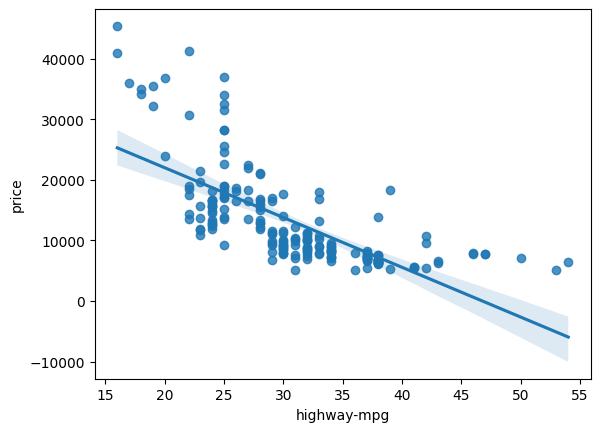

In [7]:
X = df[['highway-mpg']]
Y = df['price']
sns.regplot(x = 'highway-mpg' , y = 'price' , data = df)
lm.fit(X,Y)

In [8]:
Yhat = lm.predict(X)
Yhat[0:10]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508, 17879.97140011, 17879.97140011, 17879.97140011,
       21988.63829172, 14593.03788682])

In [9]:
lm.intercept_

38423.3058581574

In [10]:
lm.coef_

array([-821.73337832])

In [11]:
lm1 = LinearRegression()
lm1.fit(df[['engine-size']],df['price'])

LinearRegression()

In [12]:
lm1.coef_

array([166.86001569])

In [13]:
lm1.intercept_

-7963.338906281024

In [14]:
Z = df[['horsepower','curb-weight','engine-size','highway-mpg']]

In [15]:
mlm = LinearRegression()
mlm.fit(Z , df['price'])

LinearRegression()

In [16]:
Yhat = mlm.predict(Z)

In [17]:
Yhat[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

In [18]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


(0.0, 48178.507869425346)

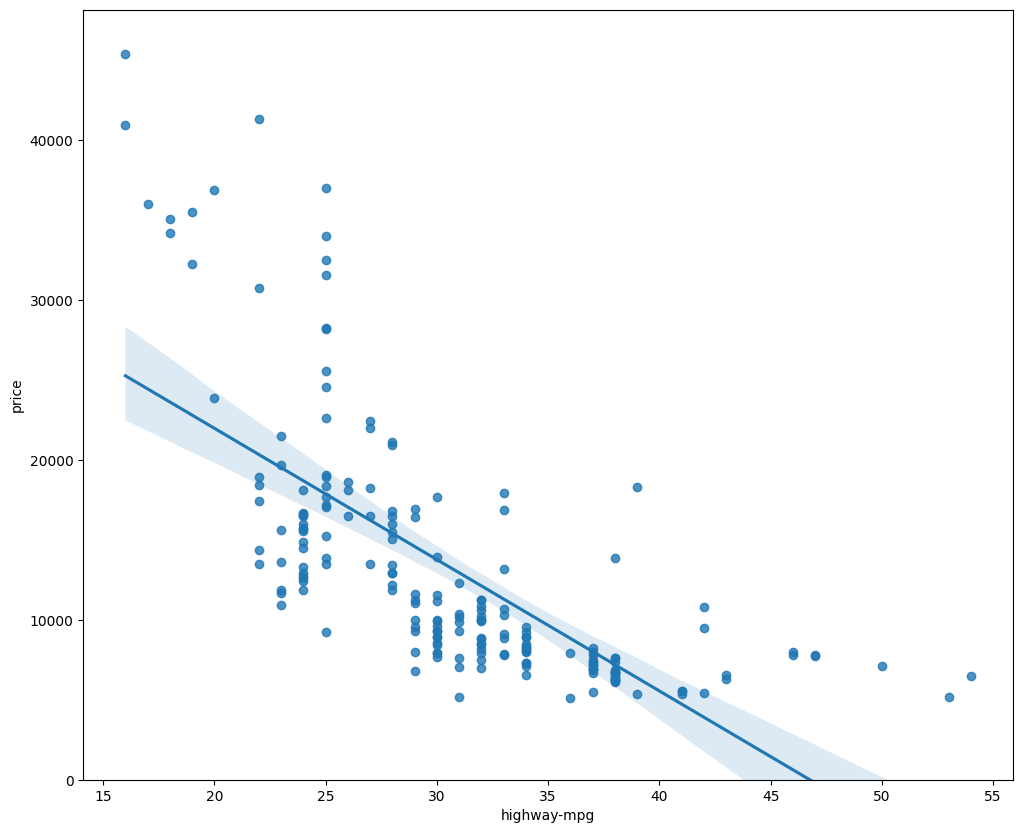

In [19]:
plot.figure(figsize=(12,10))
sns.regplot(x = 'highway-mpg' , y = 'price' , data = df)
plot.ylim(0,)

(0.0, 47414.1)

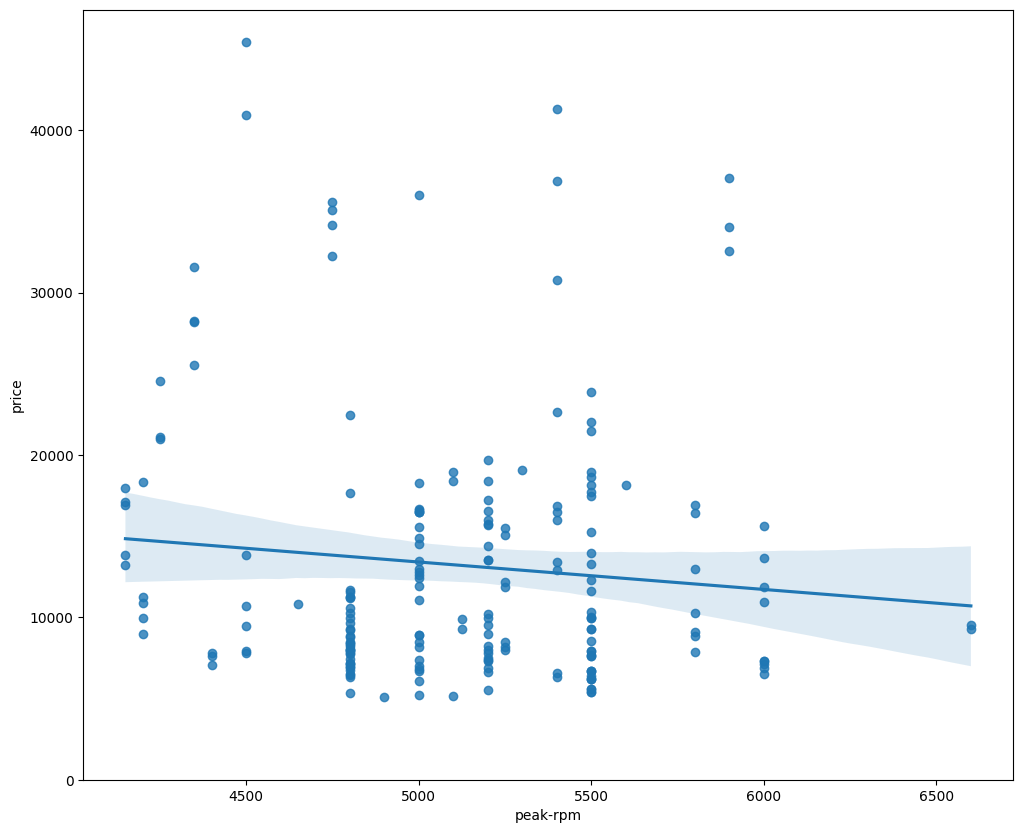

In [20]:
plot.figure(figsize = (12,10))
sns.regplot(x = 'peak-rpm' , y = 'price' , data = df)
plot.ylim(0,)

In [21]:
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


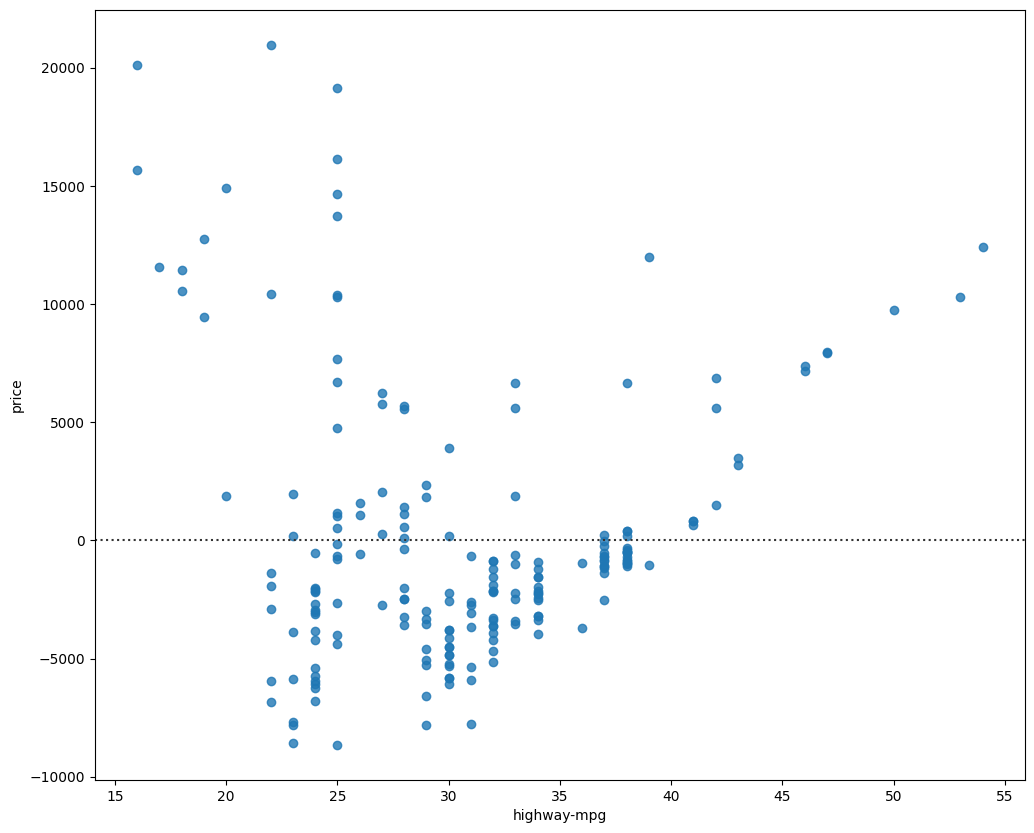

In [22]:
plot.figure(figsize = (12,10))
sns.residplot(x = df['highway-mpg'] , y = df['price'])
plot.show()

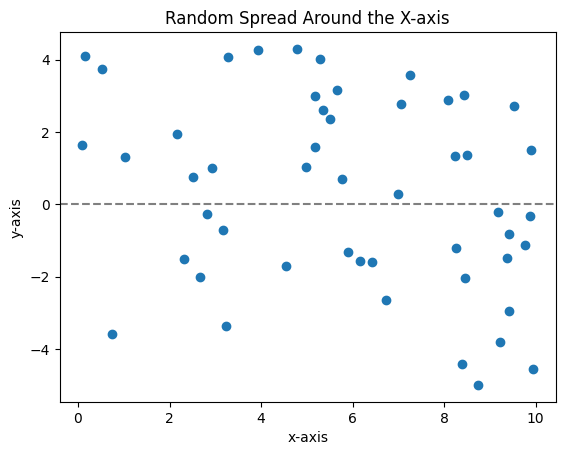

In [23]:
x = np.random.uniform(0, 10, 50)  # Random x values between 0 and 10
y = np.random.uniform(-5, 5, 50)  # Random y values between -5 and 5

# Plot the points
plot.scatter(x, y)
plot.axhline(0, color='gray', linestyle='--')  # x-axis for reference
plot.xlabel('x-axis')
plot.ylabel('y-axis')
plot.title('Random Spread Around the X-axis')
plot.show()

In [25]:
Y_hat = mlm.predict(Z)

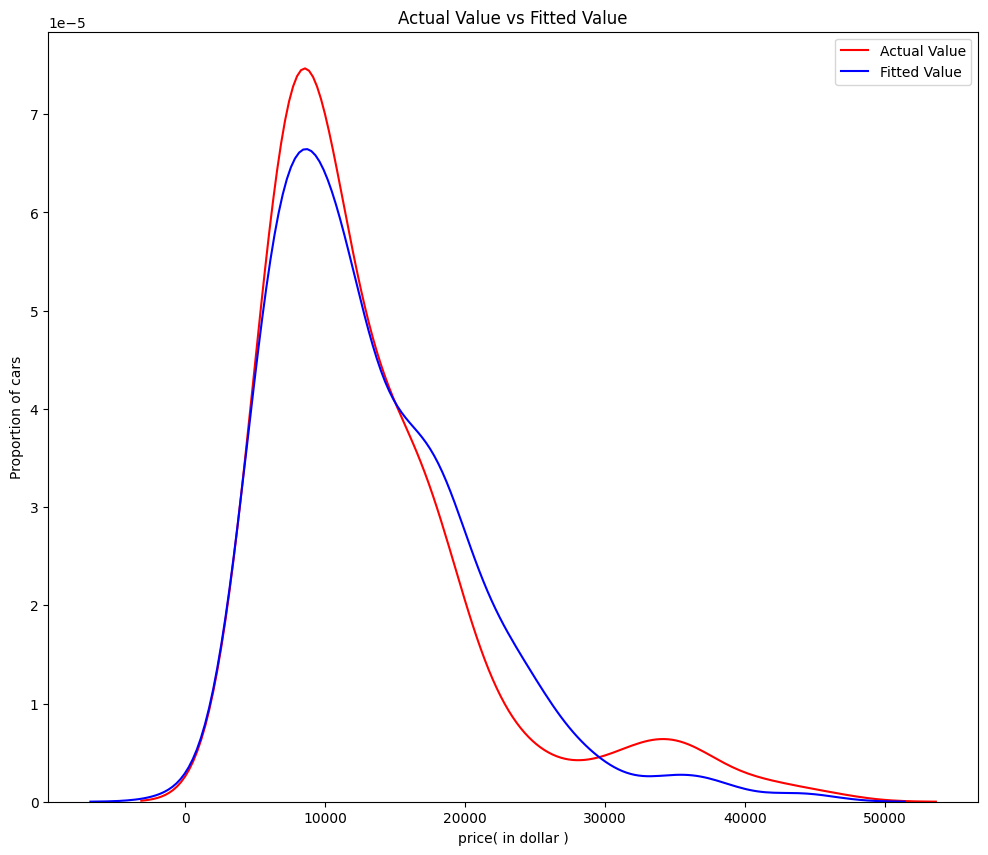

In [31]:
plot.figure(figsize = (12,10))

sns.kdeplot(df['price'], color="r", label="Actual Value", fill=False)
sns.kdeplot(Y_hat, color="b", label="Fitted Value", fill=False)

plot.title('Actual Value vs Fitted Value')
plot.xlabel('price( in dollar )')
plot.ylabel('Proportion of cars')

plot.legend()
plot.show()
plot.close()

In [38]:
def polyplot( model, independent, dependent, Name):
    x_new = np.linspace( 15, 55, 100)
    y_new = model(x_new)
    plot.plot(independent, dependent, '.', x_new, y_new, '-')
    plot.title('polynomial fit of price ~ length')
    ax = plot.gca()
    ax.set_facecolor((0.898,0.898,0.898))
    fig = plot.gcf()
    plot.xlabel(Name)
    plot.ylabel('price of cars')
    plot.show()
    plot.close()

In [39]:
X = df['highway-mpg']
Y = df['price']
f = np.polyfit(X,Y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


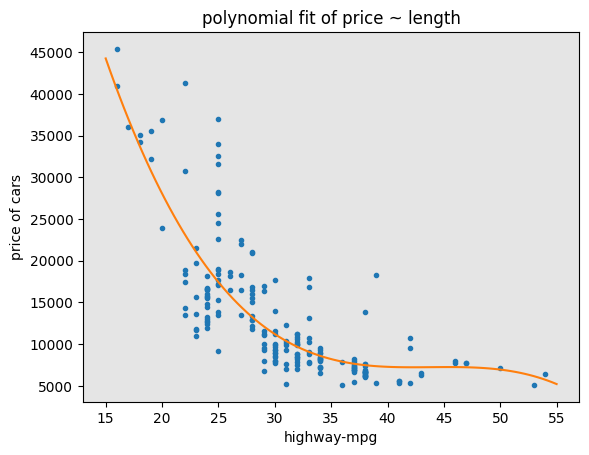

In [40]:
polyplot(p,X,Y,'highway-mpg')